In [1]:
from __future__ import print_function

import os

import numpy as np
from keras.layers import RepeatVector
from keras.layers.core import Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.models import load_model
from keras import optimizers
import csv
import matplotlib.pyplot as plt

np.random.seed(123)
users = "abcdefghi"

target_user = "i"

model_file = 'model_{}.h5'.format(target_user)

data_root = "/home/r.wang/ruowen_git/deepsense/Parse_Raw_HHAR/train_time_domain_window_4"
x_train_dir = os.path.join(data_root, target_user, "train")
x_test_dirs = []
for each_user in users:
    x_test_dirs.append(os.path.join(data_root, each_user, "eval"))
# map(lambda x: os.path.exists(x), x_test_dirs)

train_data_npy = "./train_data_128_for_{}.npy".format(target_user)
test_data_npy = "./all_test_data_128.npy"

def prepare_sequences(train_dir):
    x_train = []
    for each_csv_file in os.listdir(train_dir):
#         print(each_csv_file)
        one_csv = np.genfromtxt(os.path.join(train_dir, each_csv_file), delimiter=",", usecols=(1,2,3,4,5,6))
        x_train.append(one_csv)
    x_train = np.array(x_train)
    return x_train


# x_train = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain/a")

Using TensorFlow backend.


In [ ]:
%%bash

rm all_train_data.npy all_test_data.npy

In [ ]:
x_train = None
if os.path.exists(train_data_npy):
    x_train = np.load(train_data_npy)
else:
    x_train = prepare_sequences(x_train_dir)
    np.save(train_data_npy, x_train)

if os.path.exists(test_data_npy):
    x_test = np.load(test_data_npy)
else:
    x_test = np.concatenate(map(lambda x: prepare_sequences(x), x_test_dirs))
    np.save(test_data_npy, x_test)
    
print("x_train.shape = %s" % str(x_train.shape))
print("x_test.shape = %s" % str(x_test.shape))

In [ ]:
for each_user in users:
    x_train_dir = os.path.join(data_root, each_user, "train")
    train_data_npy = "./train_data_128_for_{}.npy".format(each_user)
    x_train = prepare_sequences(x_train_dir)
    np.save(train_data_npy, x_train)
    

In [ ]:
if os.path.exists(test_data_npy):
    x_test = np.load(test_data_npy)
else:
    x_test = np.concatenate(map(lambda x: prepare_sequences(x), x_test_dirs))
    np.save(test_data_npy, x_test)
print("x_test.shape = %s" % str(x_test.shape))

In [ ]:
%%bash

rm model.h5

In [ ]:
%%bash

mv model.h5 model_6.h5

In [ ]:
%%bash

mv model_4.h5 model.h5

In [ ]:
# TODO
# Maybe we should treat 16/32 * 6 as one time step, which will make the feature set 96/192. 
# This can help our LSTM hiden layer to increase to 96/192/256. 
# Then the total time step can be 8/16
# In sum, for each train sample: 8/16 * 16/32 * 6
# For now we have 75000 * 64 * 6 for one user data, 18750 * 16 * 16 * 6

Start training new model ...
x_train.shape = (139527, 128, 6)
Train on 139527 samples, validate on 4500 samples
Epoch 1/5
139527/139527 [==============================] - 428s - loss: 17.8657 - acc: 0.1016 - val_loss: 16.6571 - val_acc: 0.6633
Epoch 2/5
139527/139527 [==============================] - 431s - loss: 11.4019 - acc: 0.9019 - val_loss: 8.1777 - val_acc: 0.9455
Epoch 3/5
139527/139527 [==============================] - 416s - loss: 4.9006 - acc: 0.9739 - val_loss: 5.1894 - val_acc: 0.9553
Epoch 4/5
139527/139527 [==============================] - 413s - loss: 3.1375 - acc: 0.9840 - val_loss: 3.9973 - val_acc: 0.9605
Epoch 5/5
139527/139527 [==============================] - 413s - loss: 2.2524 - acc: 0.9904 - val_loss: 3.3574 - val_acc: 0.9631
x_test.shape = (4500, 128, 6)
(4500,)


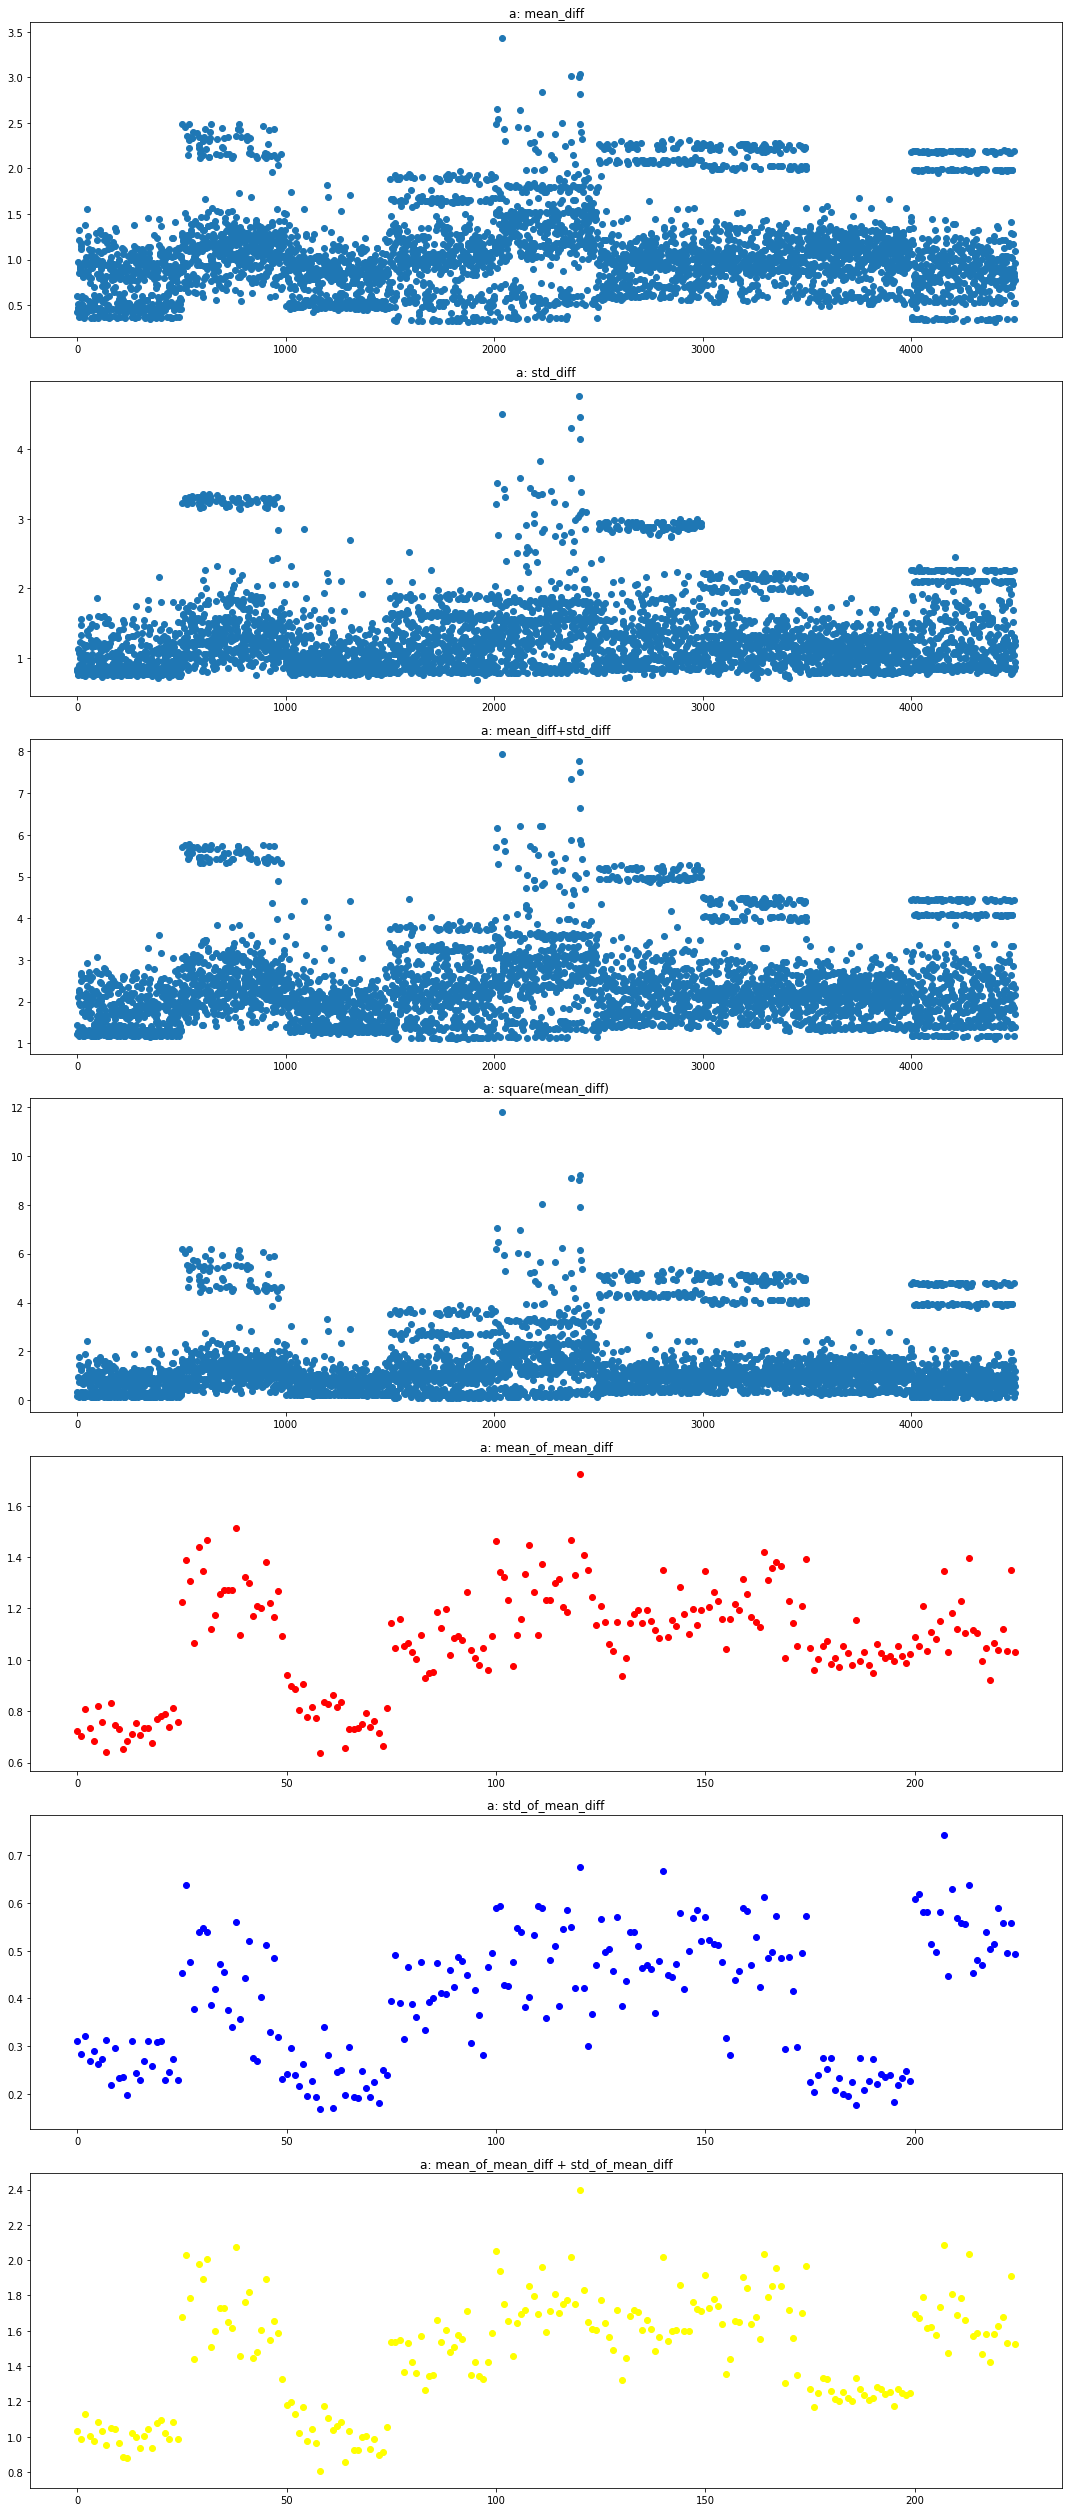

Start training new model ...
x_train.shape = (148788, 128, 6)
Train on 148788 samples, validate on 4500 samples
Epoch 1/5
148788/148788 [==============================] - 438s - loss: 19.8265 - acc: 0.0019 - val_loss: 18.7532 - val_acc: 0.0198
Epoch 2/5
148788/148788 [==============================] - 437s - loss: 18.1986 - acc: 0.0676 - val_loss: 71.9444 - val_acc: 0.4243
Epoch 3/5
148788/148788 [==============================] - 438s - loss: 15.8739 - acc: 0.6016 - val_loss: 70.5359 - val_acc: 0.7272
Epoch 4/5
148788/148788 [==============================] - 438s - loss: 15.7647 - acc: 0.6173 - val_loss: 75.6711 - val_acc: 0.7282
Epoch 5/5
148788/148788 [==============================] - 437s - loss: 15.8104 - acc: 0.6211 - val_loss: 74.9031 - val_acc: 0.7284
x_test.shape = (4500, 128, 6)
(4500,)


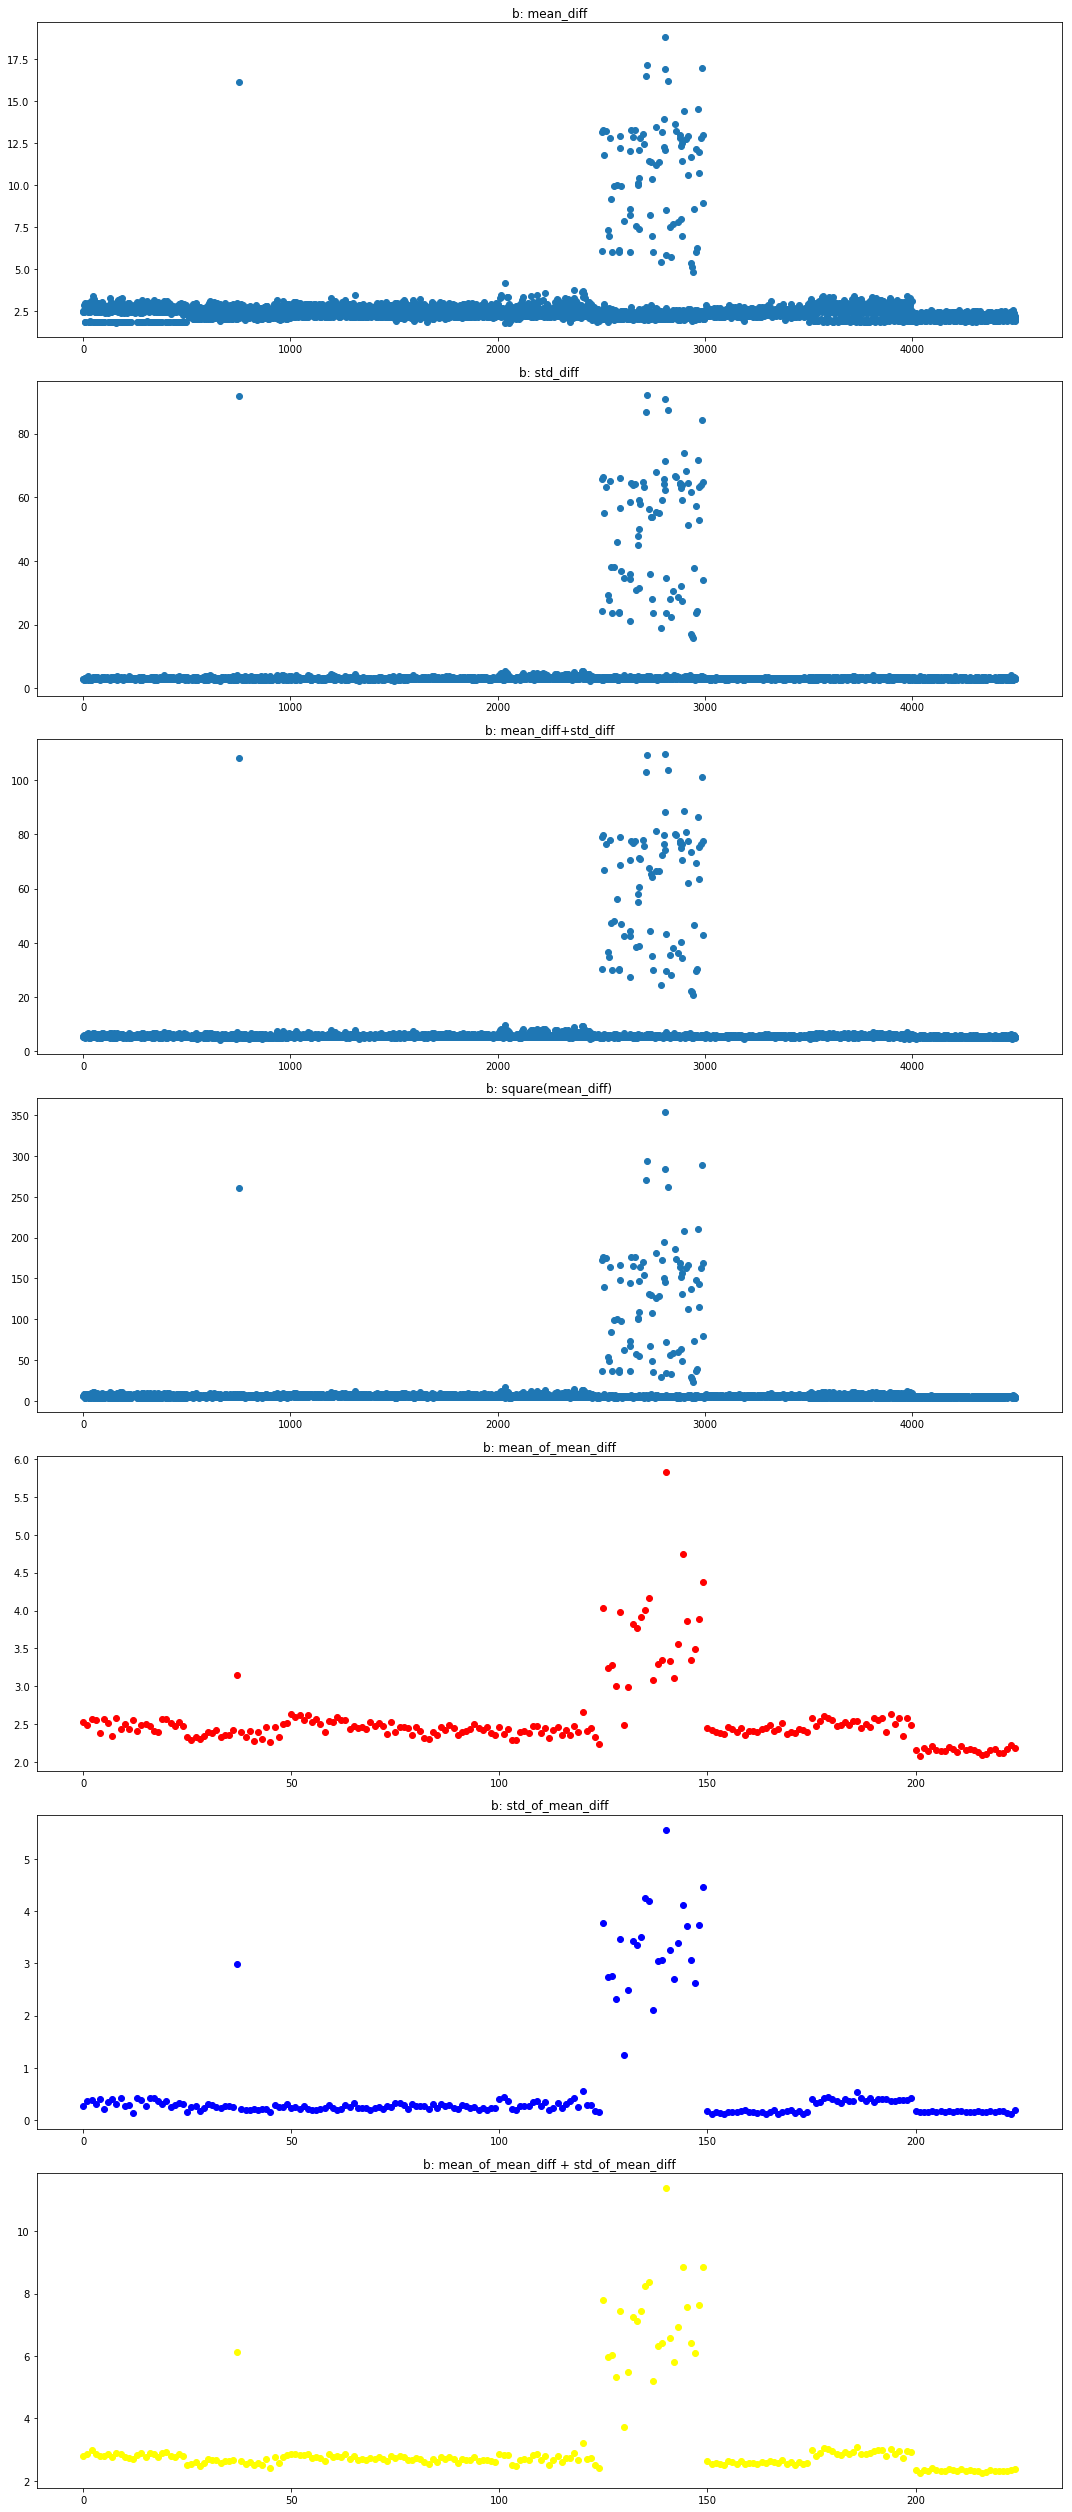

Start training new model ...
x_train.shape = (131577, 128, 6)
Train on 131577 samples, validate on 4500 samples
Epoch 1/5
131577/131577 [==============================] - 388s - loss: 16.7013 - acc: 2.0485e-04 - val_loss: 17.4332 - val_acc: 1.3542e-04
Epoch 2/5
131577/131577 [==============================] - 389s - loss: 15.1133 - acc: 2.0247e-04 - val_loss: 17.0621 - val_acc: 1.0938e-04
Epoch 3/5
 55168/131577 [===========>..................] - ETA: 223s - loss: 14.8301 - acc: 2.1780e-04

KeyboardInterrupt: 

In [3]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def main():
    window_length = 128
    select_only_last_state = False
    hidden_dim = 32
    num_epoch = 5
    batch_size = 128

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

    for each_user in users:
        model_file = 'model_{}.h5'.format(each_user)
        x_train = np.load("./train_data_128_for_{}.npy".format(each_user))
        x_test = np.load(test_data_npy)
        
        if os.path.isfile(model_file):
            print("Detect existing model, loading ...")
            m = load_model(model_file)
        else:
            print("Start training new model ...")
            print("x_train.shape = " + str(x_train.shape))
            m = Sequential()
            if select_only_last_state:
                m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=False))
                m.add(RepeatVector(window_length))
            else:
                m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
            m.add(Dropout(rate=0.25))
            m.add(LSTM(6, return_sequences=True, activation='linear'))
            mse_optimizer = optimizers.Adam(lr=0.00001)
            m.compile(loss='mse', optimizer=mse_optimizer, metrics=['accuracy'])
            m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
            m.save(model_file)

        print("x_test.shape = " + str(x_test.shape))
        pred_x_test = m.predict(x_test)
        mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
        std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
        print(mean_diff.shape)
        
#         fig = plt.figure()
        plt.figure(figsize=(15,35))
        plt.subplot(711)
        plt.title("%s: mean_diff" % each_user)
        plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
        
        plt.subplot(712)
        plt.title("%s: std_diff" % each_user)
        plt.scatter(range(0, std_diff.shape[0]), std_diff)
        
        plt.subplot(713)
        plt.title("%s: mean_diff+std_diff" % each_user)
        mean_std = mean_diff + std_diff
        plt.scatter(range(0, mean_std.shape[0]), mean_std)

        plt.subplot(714)
        plt.title("%s: square(mean_diff)" % each_user)
        square_mean = np.square(mean_diff)
        plt.scatter(range(0, square_mean.shape[0]), square_mean)

        mean_diff_reshape = mean_diff.reshape(-1, 20)
        mean_of_mean_diff = np.mean(mean_diff_reshape, axis=1) # a 6.4 sec window
        plt.subplot(715)
        plt.title("%s: mean_of_mean_diff" % each_user)
#         ax5.axis([0, mean_of_mean_diff.shape[0], 0, 1])
        plt.scatter(range(0, mean_of_mean_diff.shape[0]), mean_of_mean_diff, c="red")
#         plt.axhline(y=0.2)

        std_of_mean_diff = np.std(mean_diff_reshape, axis=1)
        plt.subplot(716)
        plt.title("%s: std_of_mean_diff" % each_user)
        plt.scatter(range(0, std_of_mean_diff.shape[0]), std_of_mean_diff, c="blue")

        plt.subplot(717)
        plt.title("%s: mean_of_mean_diff + std_of_mean_diff" % each_user)
        plt.scatter(range(0, mean_of_mean_diff.shape[0]), mean_of_mean_diff + std_of_mean_diff, c="yellow")
    
        plt.tight_layout()
        plt.savefig("result_for_%s.png" % each_user)
        plt.show()


if __name__ == '__main__':
    main()

In [ ]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def predict_with_big_window(m, test):
    pass

def main():
    window_length = 64
    select_only_last_state = False
    model_file = 'model.h5'
    hidden_dim = 12
    num_epoch = 5
    batch_size = 128
    feature_size = 6

    # no outliers.
#     signal_train, _ = get_signal(100000, outliers_size=0)
#     x_train, _ = prepare_sequences(signal_train, window_length, [])
    x_test = np.concatenate(map(lambda x: prepare_sequences(x), x_test_dirs))
    print("x_test.shape = " + str(x_test.shape))

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

    if os.path.isfile(model_file):
        m = load_model(model_file)
    else:
        x_train = prepare_sequences(x_train_dir)
        print("x_train.shape = " + str(x_train.shape))
        m = Sequential()
        if select_only_last_state:
            m.add(LSTM(hidden_dim, input_shape=(window_length, feature_size), return_sequences=False))
            m.add(RepeatVector(window_length))
        else:
            m.add(LSTM(hidden_dim, input_shape=(window_length, feature_size), return_sequences=True))
#             m.add(LSTM(hidden_dim, return_sequences=True))
        m.add(Dropout(rate=0.25))
        m.add(LSTM(feature_size, return_sequences=True, activation='linear'))
        m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
        m.save(model_file)
    
    pred_x_test = m.predict(x_test)
    mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
    std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
    print(mean_diff.shape)
    print(np.where(mean_diff > 1.5)[0].shape)
    plt.title("mean_diff")
    plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
    plt.show()
    plt.title("std_diff")
    plt.scatter(range(0, std_diff.shape[0]), std_diff)
    plt.show()
    mean_std = mean_diff + std_diff
    plt.title("mean_diff + std_diff")
    plt.scatter(range(0, mean_std.shape[0]), mean_std)
    plt.show()
    mean_2std = mean_diff + std_diff * 2
    plt.title("mean_diff + 2 * std_diff")
    plt.scatter(range(0, mean_2std.shape[0]), mean_2std)
    plt.show()
    square_mean = np.square(mean_diff)
    plt.title("square(mean_diff)")
    plt.scatter(range(0, square_mean.shape[0]), square_mean)
    plt.show()
    
#     mean_diff_reshape = mean_diff.reshape(125,-1)
    
    mean_diff_reshape = mean_diff[:70860].reshape(-1, 20)
#     max_min_mean_diff = 
    mean_of_mean_diff = np.mean(mean_diff_reshape, axis=1) # a 6.4 sec window
    plt.title("mean_of_mean_diff")
    plt.axis([0, mean_of_mean_diff.shape[0], 0, 1])
    plt.scatter(range(0, mean_of_mean_diff.shape[0]), mean_of_mean_diff, c="red")
    plt.show()
    std_of_mean_diff = np.std(mean_diff_reshape, axis=1)
    plt.title("std_of_mean_diff")
    plt.scatter(range(0, mean_of_mean_diff.shape[0]), std_of_mean_diff, c="blue")
    plt.show()
    plt.title("mean_of_mean_diff + std_of_mean_diff")
    plt.scatter(range(0, mean_of_mean_diff.shape[0]), mean_of_mean_diff + std_of_mean_diff, c="yellow")
    plt.show()
    
#     print("mae_of_predictions: ")
#     print(mae_of_predictions)
#     mean, std = np.mean(mae_of_predictions), np.std(mae_of_predictions) 
#     mae_threshold = mean + std # can use a running mean instead.
#     actual = np.where(mae_of_predictions > mae_threshold)[0]
#     print("mean = {}, std = {}".format(mean, std))
#     print(mae_threshold)
#     print(actual)

#     tp, fn, fp, tn = tp_fn_fp_tn(set(range(len(pred_x_test))), range(500, 1000), actual)
#     print("tp = {}, fn = {}, fp = {}, tn = {}".format(tp, fn, fp, tn))
#     precision = float(tp) / (tp + fp)
#     if tp + fn != 0.0:
#         hit_rate = float(tp) / (tp + fn)
#     else:
#         hit_rate = float(tp) / 0.000001
#     accuracy = float(tp + tn) / (tp + tn + fp + fn)

#     print('precision = {}, hit_rate = {}, accuracy = {}'.format(precision, hit_rate, accuracy))


if __name__ == '__main__':
    main()

In [ ]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def main():
    window_length = 128
    select_only_last_state = False
    model_file = 'model.h5'
    hidden_dim = 64
    num_epoch = 5
    batch_size = 128

    # no outliers.
#     signal_train, _ = get_signal(100000, outliers_size=0)
#     x_train, _ = prepare_sequences(signal_train, window_length, [])

    # 35233 train from a, 500 test from a
    x_test1 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_4/a/eval")
    print("x_test1.shape = " + str(x_test1.shape))
    # 500 test from b
    x_test2 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_4/b/eval")
    print("x_test2.shape = " + str(x_test2.shape))
    x_test = np.concatenate((x_test1, x_test2))
    print("x_test.shape = " + str(x_test.shape))

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

    if os.path.isfile(model_file):
        m = load_model(model_file)
    else:
        x_train = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_4/a/train")
        print("x_train.shape = " + str(x_train.shape))
        m = Sequential()
        if select_only_last_state:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=False))
            m.add(RepeatVector(window_length))
        else:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
    #             m.add(LSTM(hidden_dim, return_sequences=True))
        m.add(Dropout(rate=0.25))
        m.add(LSTM(6, return_sequences=True, activation='linear'))
        m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
        m.save(model_file)

    pred_x_test = m.predict(x_test)
    mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
    std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
    print(mean_diff.shape)
    print(np.where(mean_diff > 1.5)[0].shape)
    plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
    plt.show()
    plt.scatter(range(0, std_diff.shape[0]), std_diff)
    plt.show()
    mean_std = mean_diff + std_diff
    plt.scatter(range(0, mean_std.shape[0]), mean_std)
    plt.show()
    mean_2std = mean_diff + std_diff * 5
    plt.scatter(range(0, mean_2std.shape[0]), mean_2std)
    plt.show()
    
#     print("mae_of_predictions: ")
#     print(mae_of_predictions)
#     mean, std = np.mean(mae_of_predictions), np.std(mae_of_predictions) 
#     mae_threshold = mean + std # can use a running mean instead.
#     actual = np.where(mae_of_predictions > mae_threshold)[0]
#     print("mean = {}, std = {}".format(mean, std))
#     print(mae_threshold)
#     print(actual)

#     tp, fn, fp, tn = tp_fn_fp_tn(set(range(len(pred_x_test))), range(500, 1000), actual)
#     print("tp = {}, fn = {}, fp = {}, tn = {}".format(tp, fn, fp, tn))
#     precision = float(tp) / (tp + fp)
#     if tp + fn != 0.0:
#         hit_rate = float(tp) / (tp + fn)
#     else:
#         hit_rate = float(tp) / 0.000001
#     accuracy = float(tp + tn) / (tp + tn + fp + fn)

#     print('precision = {}, hit_rate = {}, accuracy = {}'.format(precision, hit_rate, accuracy))


if __name__ == '__main__':
    main()

In [ ]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def main():
    window_length = 64
    select_only_last_state = False
    model_file = 'model.h5'
    hidden_dim = 4
    num_epoch = 20
    batch_size = 128

    # no outliers.
#     signal_train, _ = get_signal(100000, outliers_size=0)
#     x_train, _ = prepare_sequences(signal_train, window_length, [])

    # 35233 train from a, 500 test from a
    x_test1 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/eval")
    print("x_test1.shape = " + str(x_test1.shape))
    # 500 test from b
    x_test2 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/b/eval")
    print("x_test2.shape = " + str(x_test2.shape))
    x_test = np.concatenate((x_test1, x_test2))
    print("x_test.shape = " + str(x_test.shape))

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

    if os.path.isfile(model_file):
        m = load_model(model_file)
    else:
        x_train = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/train")
        print("x_train.shape = " + str(x_train.shape))
        m = Sequential()
        if select_only_last_state:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=False))
            m.add(RepeatVector(window_length))
        else:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
#             m.add(LSTM(hidden_dim, return_sequences=True))
        m.add(Dropout(rate=0.25))
        m.add(LSTM(6, return_sequences=True, activation='linear'))
        m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
        m.save(model_file)

    pred_x_test = m.predict(x_test)
    mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
    std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
    print(mean_diff.shape)
    print(np.where(mean_diff > 1.5)[0].shape)
    plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
    plt.show()
    plt.scatter(range(0, std_diff.shape[0]), std_diff)
    plt.show()
    
    
#     print("mae_of_predictions: ")
#     print(mae_of_predictions)
#     mean, std = np.mean(mae_of_predictions), np.std(mae_of_predictions) 
#     mae_threshold = mean + std # can use a running mean instead.
#     actual = np.where(mae_of_predictions > mae_threshold)[0]
#     print("mean = {}, std = {}".format(mean, std))
#     print(mae_threshold)
#     print(actual)

#     tp, fn, fp, tn = tp_fn_fp_tn(set(range(len(pred_x_test))), range(500, 1000), actual)
#     print("tp = {}, fn = {}, fp = {}, tn = {}".format(tp, fn, fp, tn))
#     precision = float(tp) / (tp + fp)
#     if tp + fn != 0.0:
#         hit_rate = float(tp) / (tp + fn)
#     else:
#         hit_rate = float(tp) / 0.000001
#     accuracy = float(tp + tn) / (tp + tn + fp + fn)

#     print('precision = {}, hit_rate = {}, accuracy = {}'.format(precision, hit_rate, accuracy))


if __name__ == '__main__':
    main()

In [ ]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def main():
    window_length = 64
    select_only_last_state = False
    model_file = 'model.h5'
    hidden_dim = 64
    num_epoch = 5
    batch_size = 128

    # no outliers.
#     signal_train, _ = get_signal(100000, outliers_size=0)
#     x_train, _ = prepare_sequences(signal_train, window_length, [])

    # 35233 train from a, 500 test from a
    x_test1 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/eval")
    print("x_test1.shape = " + str(x_test1.shape))
    # 500 test from b
    x_test2 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/b/eval")
    print("x_test2.shape = " + str(x_test2.shape))
    x_test = np.concatenate((x_test1, x_test2))
    print("x_test.shape = " + str(x_test.shape))

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

    if os.path.isfile(model_file):
        m = load_model(model_file)
    else:
        x_train = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/train")
        print("x_train.shape = " + str(x_train.shape))
        m = Sequential()
        if select_only_last_state:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=False))
            m.add(RepeatVector(window_length))
        else:
            m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
#             m.add(LSTM(hidden_dim, return_sequences=True))
        m.add(Dropout(rate=0.25))
        m.add(LSTM(6, return_sequences=True, activation='linear'))
        
        # Add a second AutoEncoder
        m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
        m.add(Dropout(rate=0.25))
        m.add(LSTM(6, return_sequences=True, activation='linear'))
        
        
        m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
        m.save(model_file)

    pred_x_test = m.predict(x_test)
    mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
    std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
    print(mean_diff.shape)
    print(np.where(mean_diff > 1.5)[0].shape)
    plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
    plt.show()
    plt.scatter(range(0, std_diff.shape[0]), std_diff)
    plt.show()
    
    
#     print("mae_of_predictions: ")
#     print(mae_of_predictions)
#     mean, std = np.mean(mae_of_predictions), np.std(mae_of_predictions) 
#     mae_threshold = mean + std # can use a running mean instead.
#     actual = np.where(mae_of_predictions > mae_threshold)[0]
#     print("mean = {}, std = {}".format(mean, std))
#     print(mae_threshold)
#     print(actual)

#     tp, fn, fp, tn = tp_fn_fp_tn(set(range(len(pred_x_test))), range(500, 1000), actual)
#     print("tp = {}, fn = {}, fp = {}, tn = {}".format(tp, fn, fp, tn))
#     precision = float(tp) / (tp + fp)
#     if tp + fn != 0.0:
#         hit_rate = float(tp) / (tp + fn)
#     else:
#         hit_rate = float(tp) / 0.000001
#     accuracy = float(tp + tn) / (tp + tn + fp + fn)

#     print('precision = {}, hit_rate = {}, accuracy = {}'.format(precision, hit_rate, accuracy))


if __name__ == '__main__':
    main()

In [ ]:
def tp_fn_fp_tn(total, expected, actual):
    tp = len(set(expected).intersection(set(actual)))
    fn = len(set(expected) - set(actual))
    fp = len(set(actual) - set(expected))
    tn = len((total - set(expected)).intersection(total - set(actual)))
    return tp, fn, fp, tn


def main():
    window_length = 64
    select_only_last_state = True
    model_file = 'model.h5'
    hidden_dim = 16
    num_epoch = 20
    batch_size = 128

    # no outliers.
#     signal_train, _ = get_signal(100000, outliers_size=0)
#     x_train, _ = prepare_sequences(signal_train, window_length, [])

    # 35233 train from a, 500 test from a
    x_test1 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/eval")
    print("x_test1.shape = " + str(x_test1.shape))
    # 500 test from b
    x_test2 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/b/eval")
    print("x_test2.shape = " + str(x_test2.shape))
    x_test = np.concatenate((x_test1, x_test2))
    print("x_test.shape = " + str(x_test.shape))

    # 1 percent are outliers.
#     signal_test, random_indices = get_signal(100000, outliers_size=0.0)
#     x_test, contain_outliers = prepare_sequences(signal_test, window_length, random_indices)
#     outlier_indices = np.where(contain_outliers)[0]

#     if os.path.isfile(model_file):
#         m = load_model(model_file)
#     else:
    x_train = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/a/train")
    print("x_train.shape = " + str(x_train.shape))
    m = Sequential()
    if select_only_last_state:
        m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=False))
        m.add(RepeatVector(window_length))
    else:
        m.add(LSTM(hidden_dim, input_shape=(window_length, 6), return_sequences=True))
#             m.add(LSTM(hidden_dim, return_sequences=True))
    m.add(Dropout(rate=0.25))
    m.add(LSTM(6, return_sequences=True, activation='linear'))
    m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    m.fit(x_train, x_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, x_test))
    m.save(model_file)

    pred_x_test = m.predict(x_test)
    mean_diff = np.mean(np.abs(pred_x_test - x_test), axis=(1,2))
    std_diff = np.std(np.abs(pred_x_test - x_test), axis=(1,2))
    print(mean_diff.shape)
    print(np.where(mean_diff > 1.5)[0].shape)
    plt.scatter(range(0, mean_diff.shape[0]), mean_diff)
    plt.show()
    plt.scatter(range(0, std_diff.shape[0]), std_diff)
    plt.show()
    
    
#     print("mae_of_predictions: ")
#     print(mae_of_predictions)
#     mean, std = np.mean(mae_of_predictions), np.std(mae_of_predictions) 
#     mae_threshold = mean + std # can use a running mean instead.
#     actual = np.where(mae_of_predictions > mae_threshold)[0]
#     print("mean = {}, std = {}".format(mean, std))
#     print(mae_threshold)
#     print(actual)

#     tp, fn, fp, tn = tp_fn_fp_tn(set(range(len(pred_x_test))), range(500, 1000), actual)
#     print("tp = {}, fn = {}, fp = {}, tn = {}".format(tp, fn, fp, tn))
#     precision = float(tp) / (tp + fp)
#     if tp + fn != 0.0:
#         hit_rate = float(tp) / (tp + fn)
#     else:
#         hit_rate = float(tp) / 0.000001
#     accuracy = float(tp + tn) / (tp + tn + fp + fn)

#     print('precision = {}, hit_rate = {}, accuracy = {}'.format(precision, hit_rate, accuracy))


if __name__ == '__main__':
    main()

In [ ]:
mean = 9.10096278339
std = 21.0019555399

In [ ]:
model_file = 'model.h5'
m = None
if os.path.isfile(model_file):
    m = load_model(model_file)
    
x_test2 = prepare_sequences("/home/r.wang/git/deepsense/Parse_Raw_HHAR/train_time_domain_window_8/b/eval")
print("x_test2.shape = " + str(x_test2.shape))

In [ ]:
pred_x_test = m.predict(x_test2)
error = pred_x_test - x_test2
error.shape
np.mean(error, axis=0)
